In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/kidney.csv')

In [6]:
df.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Kidney_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,2.9
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,3.1
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,3.0
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,2.9
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,2.4


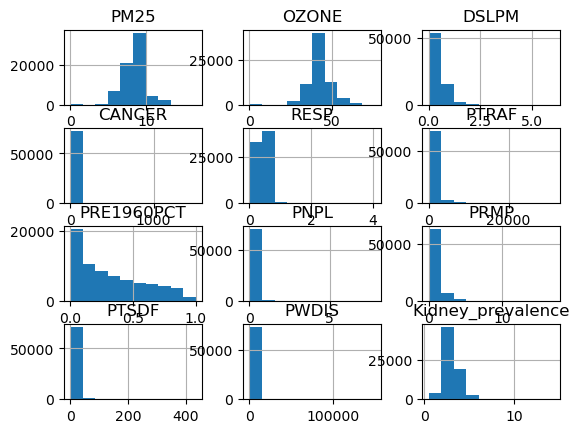

In [7]:
df.hist()
plt.show()

In [8]:
X = df.copy()
X.drop('Kidney_prevalence', axis=1, inplace=True)
y = df['Kidney_prevalence']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

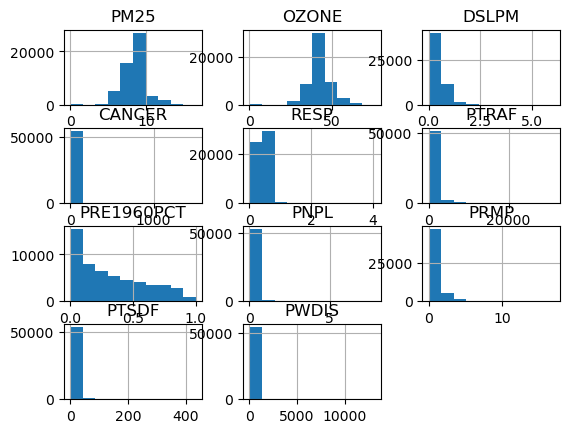

In [10]:
X_train.hist()
plt.show()

In [11]:
X_train.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
21067003702,8.911976,44.153522,0.485490,29.206450,0.400384,414.893363,0.059702,0.011293,3.373722,1.244311,3.968160
6089011701,7.811778,50.354122,0.111954,40.933778,0.640852,479.384221,0.066853,0.070735,0.681320,0.120192,0.159548
53073000100,6.241130,33.216318,0.235813,28.268955,0.371862,383.825352,0.118878,0.196708,0.815984,2.282778,0.008832
38003967900,6.537008,37.223021,0.104244,13.940819,0.160688,9.644077,0.542933,0.005580,0.233907,0.017411,0.002114
1125010803,9.284398,36.488277,0.381483,48.431719,0.723650,122.794883,0.171810,0.013565,0.214935,1.312126,0.000072


In [12]:
# Saving data without normalization

X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_kidney')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_kidney')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_kidney')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_kidney')

In [13]:
# Taking the log of the data in X_train that are not close to being normally distributed


pt = PowerTransformer()
pt.fit(X_train[['DSLPM']])
X_train['DSLPM'] = pt.transform(X_train[['DSLPM']])

pt1 = PowerTransformer()
pt1.fit(X_train[['CANCER']])
X_train['CANCER'] = pt1.transform(X_train[['CANCER']])

pt2 = PowerTransformer()
pt2.fit(X_train[['RESP']])
X_train['RESP'] = pt2.transform(X_train[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train[['PTRAF']])
X_train['PTRAF'] = pt3.transform(X_train[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train[['PRE1960PCT']])
X_train['PRE1960PCT'] = pt4.transform(X_train[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train[['PNPL']])
X_train['PNPL'] = pt5.transform(X_train[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train[['PRMP']])
X_train['PRMP'] = pt6.transform(X_train[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train[['PTSDF']])
X_train['PTSDF'] = pt7.transform(X_train[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train['PWDIS'] = pt8.transform(X_train[['PWDIS']])

pt9 = PowerTransformer()
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)
pt9.fit(y_train)
y_train = pt9.transform(y_train)
y_train = np.ravel(y_train)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 11) (54242,) (18081, 11) (18081,)


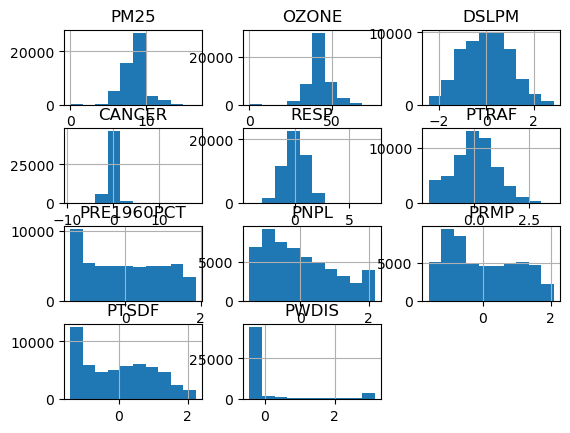

In [15]:
X_train.hist()
plt.show()

PWDIS should just be left out of the data since it is not normally distributed.

In [16]:
X_train.drop('PWDIS', axis=1, inplace=True)
X_test.drop('PWDIS', axis=1, inplace=True)

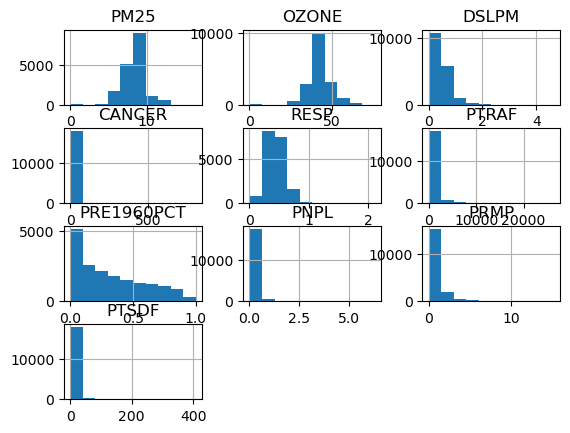

In [17]:
X_test.hist()
plt.show()

In [18]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test['DSLPM'] = pt.transform(X_test[['DSLPM']])

X_test['CANCER'] = pt1.transform(X_test[['CANCER']])

X_test['RESP'] = pt2.transform(X_test[['RESP']]) 

X_test['PTRAF'] = pt3.transform(X_test[['PTRAF']])

X_test['PRE1960PCT'] = pt4.transform(X_test[['PRE1960PCT']])

X_test['PNPL'] = pt5.transform(X_test[['PNPL']])

X_test['PRMP'] = pt6.transform(X_test[['PRMP']])

X_test['PTSDF'] = pt7.transform(X_test[['PTSDF']])



y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = pt9.transform(y_test)
y_test = np.ravel(y_test)


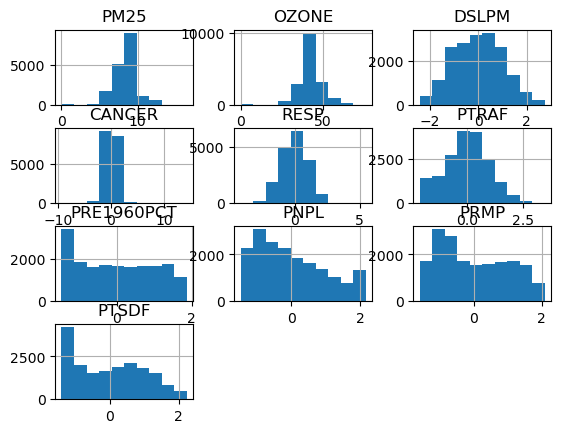

In [19]:
X_test.hist()
plt.show()

Kidney data should now be ready to model

In [20]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 10) (54242,) (18081, 10) (18081,)


In [21]:
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_kidney')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_kidney')

y_test = pd.Series(y_test)
y_train = pd.Series(y_train)
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_kidney')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_kidney')